Root Mean Squared Error: 33362.308561012986
R-squared: 0.8548896614752428


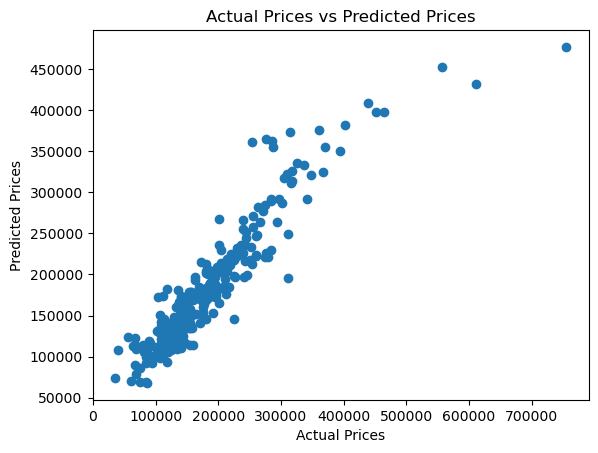

Best Hyperparameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 150}


In [21]:

                               #Traing the model and evaluating the model




# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'train (1).csv'
data = pd.read_csv(dataset_path)

# Drop columns with a high percentage of missing values or columns that might not be useful
data = data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1)

# Select features and target variable
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']
X = data[selected_features]
y = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor that applies transformers to different feature types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a Random Forest regression model within a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Define hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Visualize the predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


In [2]:

                           # Testing the model


# Assuming you have a new dataset for testing (replace 'test.csv' with your file)
test_dataset_path = 'test (1).csv'
new_data = pd.read_csv(test_dataset_path)

# Drop the same columns as in the training data
new_data = new_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1)

# Select the same features as in the training data
X_new = new_data[selected_features]

# Make predictions using the trained model
y_pred_new = model.predict(X_new)

# Display the predicted prices
predicted_prices = pd.DataFrame({'PredictedPrices': y_pred_new})
print(predicted_prices)


      PredictedPrices
0       122256.130952
1       154412.640000
2       138451.020000
3       187588.000000
4       228396.040000
...               ...
1454     78202.750000
1455     87630.250000
1456    143893.090000
1457    110571.666667
1458    240889.950000

[1459 rows x 1 columns]
